In [1]:
from likelihood.regression_models import arima
from likelihood.tools import generate_series, scale, rescale
from likelihood import walkers
import numpy as np
import matplotlib.pyplot as plt 

plt.rcParams['font.size'] = 12
plt.style.use('bmh')

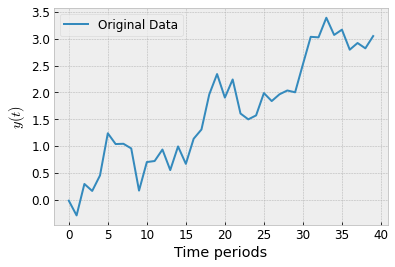

In [2]:
# We generate a time series with 25 points and with slope
a = generate_series(1, 40, incline=True)
y_serie = np.copy(a[0, :])

# Graph the data for visualization
plt.plot(range(len(y_serie)), y_serie, label = 'Original Data')
plt.legend()
plt.xlabel('Time periods')
plt.ylabel('$y(t)$')
plt.show()

Accuracy: 0.2787
RMSE: 0.5149


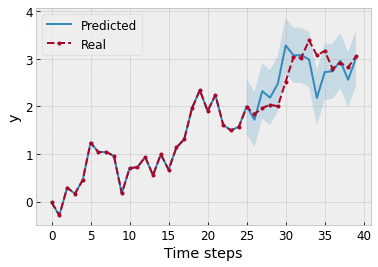

In [3]:
# Standardize the data and subtract the slope
y_scale, values = rescale(a)
y_train = y_scale[0, :25]
y_val = y_scale[0, 25:]
# We define the regression model
model = arima(y_train)
model.train(nwalkers = 15, noise = 0)
model.save_model('model')
model.load_model('model')
model.eval(y_val)
# We predict 15 points forward
y_pred = model.predict(15)
y_pred = y_pred[..., np.newaxis]
y_pred = y_pred.reshape(-1, y_pred.shape[0])
y_pred = scale(y_pred, values)
model.plot_pred(y_serie, y_pred[0, :])